In [7]:
import cv2
import numpy as np

In [8]:
point_3d = np.array([
    [0, 0, 0],    
    [0, 14, 7],   
    [0, 14, 14],  
    [0, 7, 14],   
    [7, 7, 0],    
    [14, 7, 0],   
    [14, 14, 0],  
    [7, 14, 0],   
    [7, 0, 7],    
    [7, 0, 14],   
    [14, 0, 14],  
    [14, 0, 7]    
])

point_2d = np.array([
    [431, 596],  
    [365, 466],  
    [315, 508],  
    [331, 596],  
    [475, 530],  
    [534, 564],  
    [528, 458],  
    [467, 441],  
    [442, 657],  
    [398, 702],
    [459, 726],
    [500, 677],
])


In [9]:
def calibrate(im, XYZ, uv):
    N = XYZ.shape[0]  
    A = []

    for i in range(N):
        X, Y, Z = XYZ[i]
        u, v = uv[i]
        A.append([X, Y, Z, 1, 0, 0, 0, 0, -u * X, -u * Y, -u * Z, -u])
        A.append([0, 0, 0, 0, X, Y, Z, 1, -v * X, -v * Y, -v * Z, -v])

    A = np.array(A)
    _, _, V = np.linalg.svd(A)  
    q = V[-1, :]  
    C = q.reshape(3, 4)  

    return C

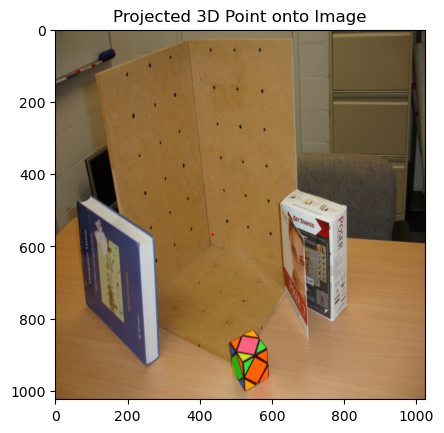

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


im = cv2.imread('stereo2012a.jpg')
im = cv2.resize(im, (1024, 1024))

C = calibrate(im, point_3d, point_2d)

world_point = np.array([[10], [10], [10], [1]]) 
image_point_homogeneous = C @ world_point  
u = image_point_homogeneous[0] / image_point_homogeneous[2]
v = image_point_homogeneous[1] / image_point_homogeneous[2]

plt.figure()
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))  
plt.plot(u, v, 'ro', markersize=1, linewidth=0.5)
plt.title('Projected 3D Point onto Image')
plt.show()

In [18]:
import numpy as np
from scipy.linalg import qr

def vgg_KR_from_P(P, noscale=False):
    N = P.shape[0]
    H = P[:, :N]  

    K, R = qr(H)

    if not noscale:
        K = K / K[N-1, N-1]
        if K[0, 0] < 0:
            D = np.diag([-1, -1] + [1] * (N - 2))
            K = K @ D
            R = D @ R

    if len(P.shape) > 1 and P.shape[1] > N:
        t = np.linalg.solve(-H, P[:, -1])
        return K, R, t
    else:
        return K, R

In [19]:
K, R, t = vgg_KR_from_P(C)

In [20]:
K

array([[ 9.99942202e-01,  1.07839283e-02,  9.39516251e-04],
       [-1.07831426e-02,  9.99942302e-01, -8.37342572e-04],
       [-9.48491133e-04,  8.27162583e-04,  1.00000000e+00]])

In [21]:
R

array([[ 6.91306503e-03, -6.56975107e-03, -9.82446010e-03],
       [ 0.00000000e+00, -2.14176394e-02,  4.12704516e-03],
       [ 0.00000000e+00,  0.00000000e+00, -1.80325298e-05]])

In [22]:
t

array([62.43639892, 51.2892686 , 68.36556005])